# NYC 311 Service Requests - Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the NYC 311 Service Requests dataset for 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('husl')

In [2]:
# Load the cleaned data from the Parquet file
df = pd.read_parquet('311_Service_Requests_2024_cleaned.parquet')

# Filter for 2024 data only
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df_2024 = df[df['Created Date'].dt.year == 2024].copy()

print(f"Total 2024 records: {len(df_2024):,}")
print(f"Date range: {df_2024['Created Date'].min()} to {df_2024['Created Date'].max()}")
print(f"Dataset shape: {df_2024.shape}")

Total 2024 records: 3,448,053
Date range: 2024-01-01 12:26:23 to 2024-12-31 12:26:04
Dataset shape: (3448053, 40)


## 1. Basic Data Profiling

In [3]:
# Basic info about the dataset
print("Dataset Info:")
print(f"Shape: {df_2024.shape}")
print(f"Memory usage: {df_2024.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumn types:")
print(df_2024.dtypes.value_counts())

Dataset Info:
Shape: (3448053, 40)
Memory usage: 5582.50 MB

Column types:
object            30
float64            5
datetime64[ns]     4
int64              1
Name: count, dtype: int64


## 2. Missing Value Analysis

In [4]:
# Missing values analysis
missing_values = df_2024.isnull().sum()
missing_percent = (missing_values / len(df_2024)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print("Top 15 columns with missing values:")
print(missing_df.head(15))

Top 15 columns with missing values:
                      Column  Missing Count  Missing Percentage
31      Taxi Company Borough        3445877           99.936892
35                 Road Ramp        3439615           99.755282
34  Bridge Highway Direction        3436538           99.666043
17             Facility Type        3433976           99.591741
19                  Due Date        3428492           99.432694
36    Bridge Highway Segment        3426960           99.388263
33       Bridge Highway Name        3426915           99.386958
32     Taxi Pick Up Location        3410857           98.921246
30              Vehicle Type        3286818           95.323883
16                  Landmark        1366880           39.642082
12     Intersection Street 1        1127566           32.701527
13     Intersection Street 2        1126107           32.659214
10            Cross Street 1         983753           28.530681
11            Cross Street 2         983524           28.524040
6   

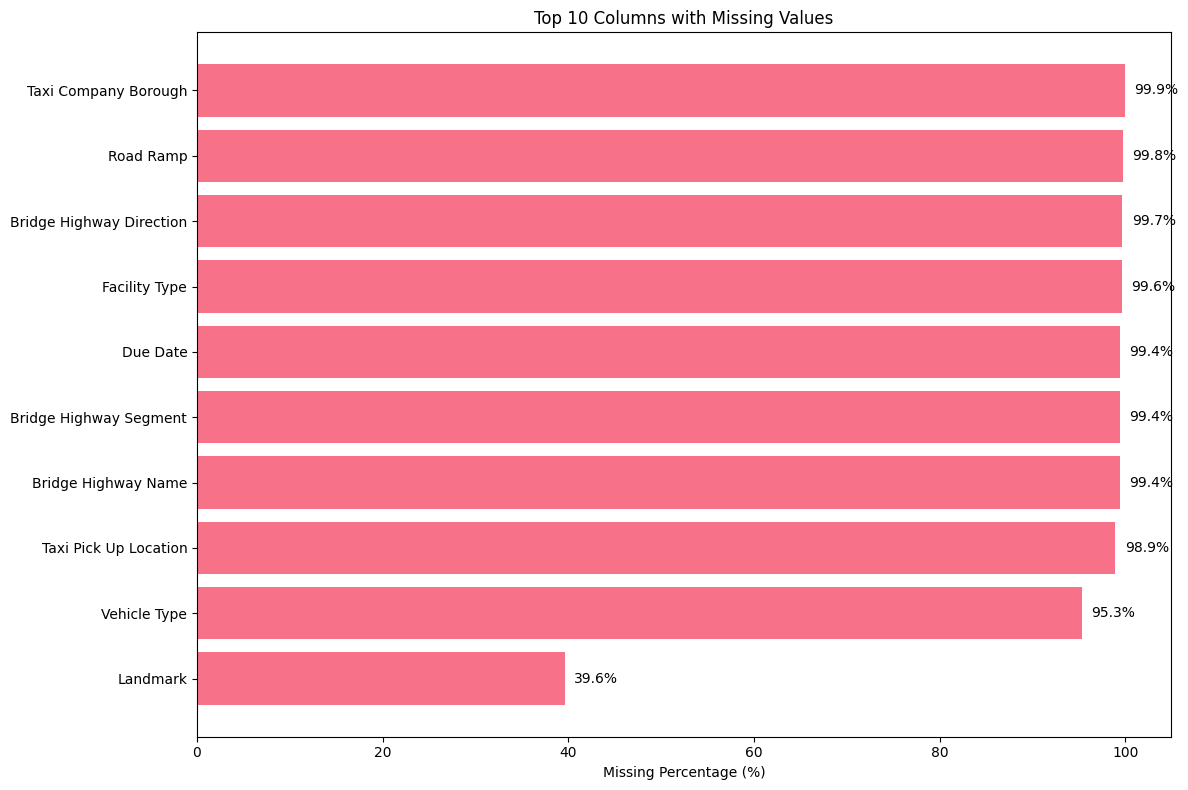

In [5]:
# Visualize missing values for top columns
plt.figure(figsize=(12, 8))
top_missing = missing_df.head(10)
plt.barh(range(len(top_missing)), top_missing['Missing Percentage'])
plt.yticks(range(len(top_missing)), top_missing['Column'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 10 Columns with Missing Values')
plt.gca().invert_yaxis()
for i, v in enumerate(top_missing['Missing Percentage']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.show()

## 3. Top Complaint Types Analysis

In [6]:
# Top complaint types
top_complaints = df_2024['Complaint Type'].value_counts().head(15)
print("Top 15 Complaint Types:")
for i, (complaint, count) in enumerate(top_complaints.items(), 1):
    print(f"{i:2d}. {complaint:<35} {count:>8,} ({count/len(df_2024)*100:.1f}%)")

Top 15 Complaint Types:
 1. Illegal Parking                      504,525 (14.6%)
 2. Noise - Residential                  375,335 (10.9%)
 3. HEAT/HOT WATER                       264,055 (7.7%)
 4. Blocked Driveway                     169,644 (4.9%)
 5. Noise - Street/Sidewalk              162,625 (4.7%)
 6. UNSANITARY CONDITION                 120,737 (3.5%)
 7. Street Condition                      72,407 (2.1%)
 8. Abandoned Vehicle                     70,201 (2.0%)
 9. Noise - Commercial                    68,099 (2.0%)
10. PLUMBING                              65,822 (1.9%)
11. Water System                          65,683 (1.9%)
12. PAINT/PLASTER                         64,339 (1.9%)
13. Dirty Condition                       59,015 (1.7%)
14. Noise                                 55,466 (1.6%)
15. Derelict Vehicles                     49,129 (1.4%)


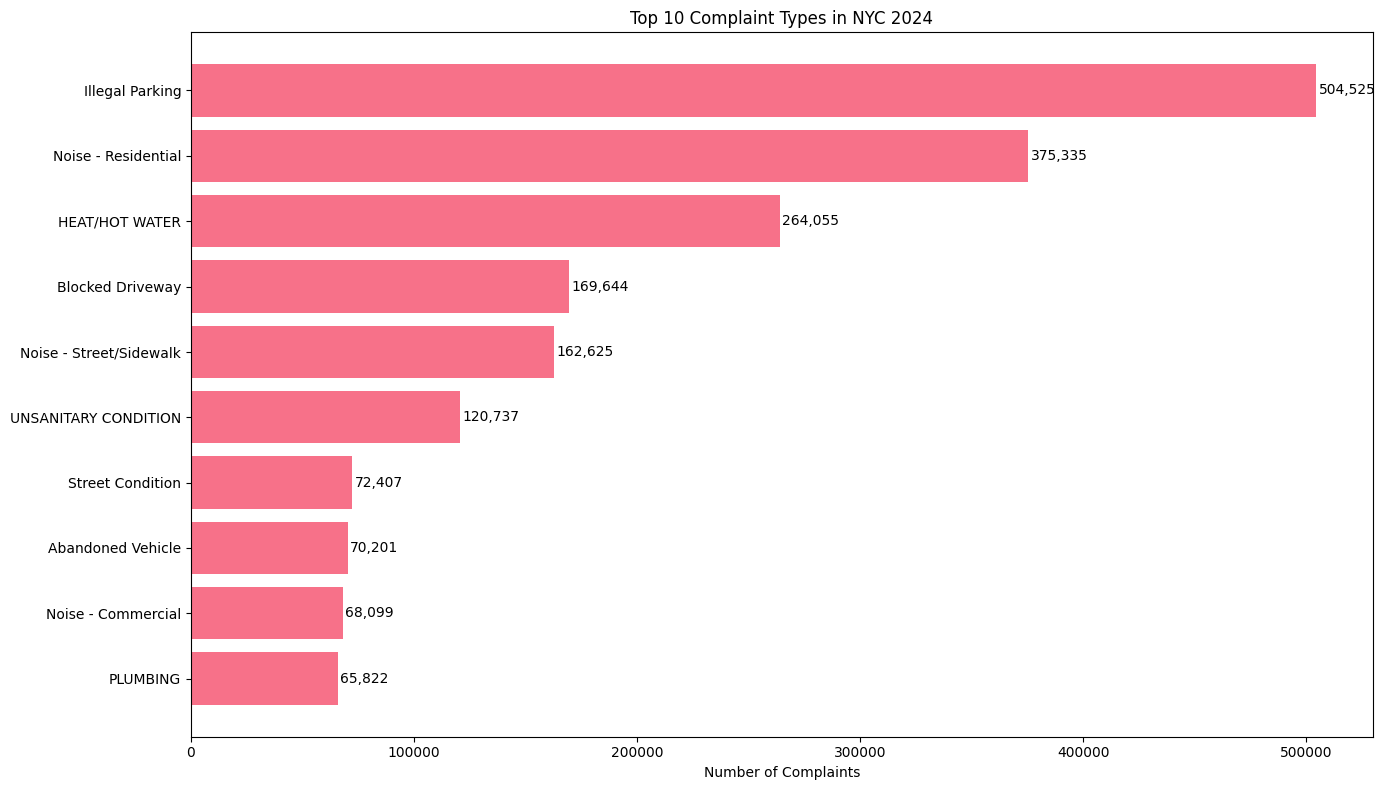

In [7]:
# Visualize top complaint types
plt.figure(figsize=(14, 8))
top_10_complaints = df_2024['Complaint Type'].value_counts().head(10)
plt.barh(range(len(top_10_complaints)), top_10_complaints.values)
plt.yticks(range(len(top_10_complaints)), top_10_complaints.index)
plt.xlabel('Number of Complaints')
plt.title('Top 10 Complaint Types in NYC 2024')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_10_complaints.values):
    plt.text(v + 1000, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

## 4. Agency Analysis

In [8]:
# Top agencies handling complaints
agency_counts = df_2024['Agency'].value_counts().head(10)
print("Top 10 Agencies by Number of Complaints:")
for i, (agency, count) in enumerate(agency_counts.items(), 1):
    print(f"{i:2d}. {agency:<15} {count:>8,} ({count/len(df_2024)*100:.1f}%)")

Top 10 Agencies by Number of Complaints:
 1. NYPD            1,541,028 (44.7%)
 2. HPD              732,793 (21.3%)
 3. DSNY             305,667 (8.9%)
 4. DOT              205,862 (6.0%)
 5. DEP              191,359 (5.5%)
 6. DPR              138,314 (4.0%)
 7. DOB              102,633 (3.0%)
 8. DOHMH             90,438 (2.6%)
 9. DHS               51,938 (1.5%)
10. TLC               37,713 (1.1%)


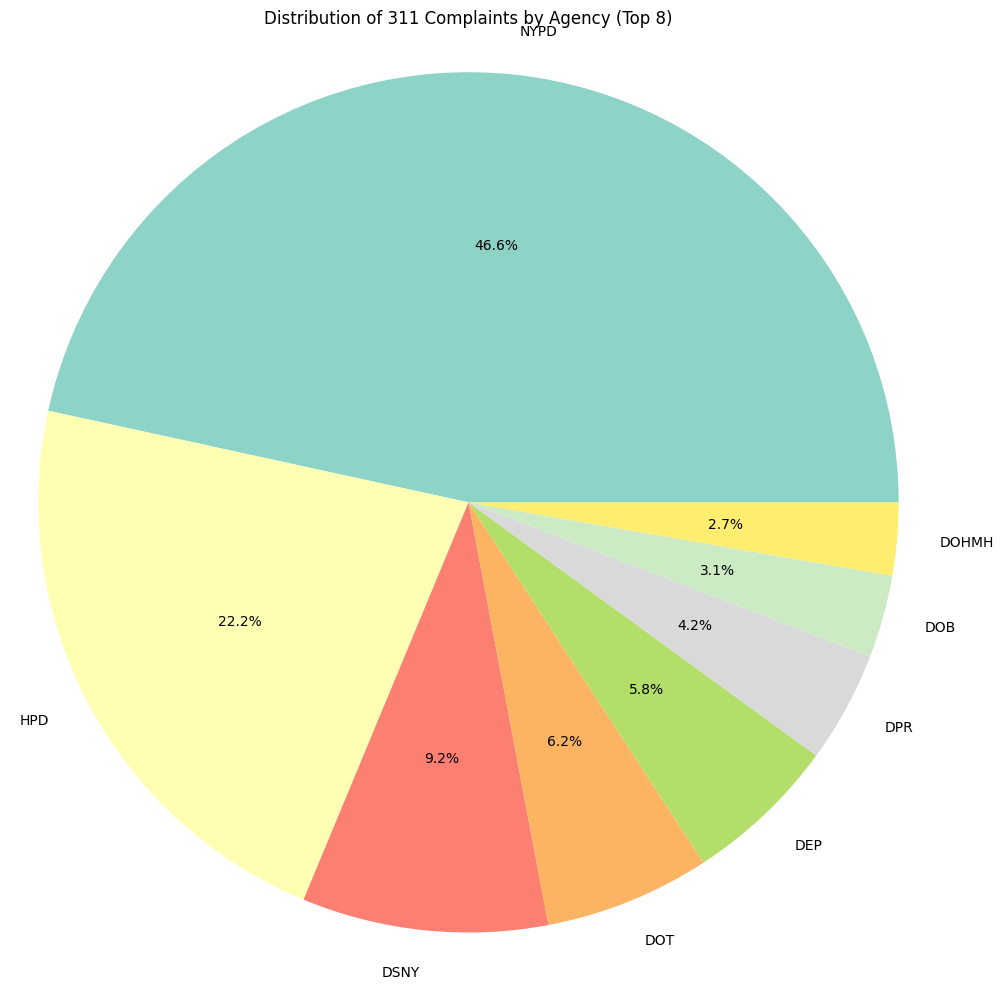

In [9]:
# Visualize agency distribution
plt.figure(figsize=(10, 10))
top_agencies = df_2024['Agency'].value_counts().head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_agencies)))
plt.pie(top_agencies.values, labels=top_agencies.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of 311 Complaints by Agency (Top 8)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 5. Distribution of Requests Over Time

In [10]:
# Monthly distribution
df_2024['Month'] = df_2024['Created Date'].dt.month
df_2024['Month_Name'] = df_2024['Created Date'].dt.strftime('%B')
monthly_counts = df_2024.groupby(['Month', 'Month_Name']).size().reset_index(name='Count')

print("Monthly Distribution of 311 Requests:")
for _, row in monthly_counts.iterrows():
    print(f"{row['Month_Name']:<12} {row['Count']:>8,}")

Monthly Distribution of 311 Requests:
January       283,764
February      240,454
March         266,700
April         267,608
May           284,102
June          306,407
July          299,269
August        285,183
September     306,973
October       306,860
November      293,560
December      307,173


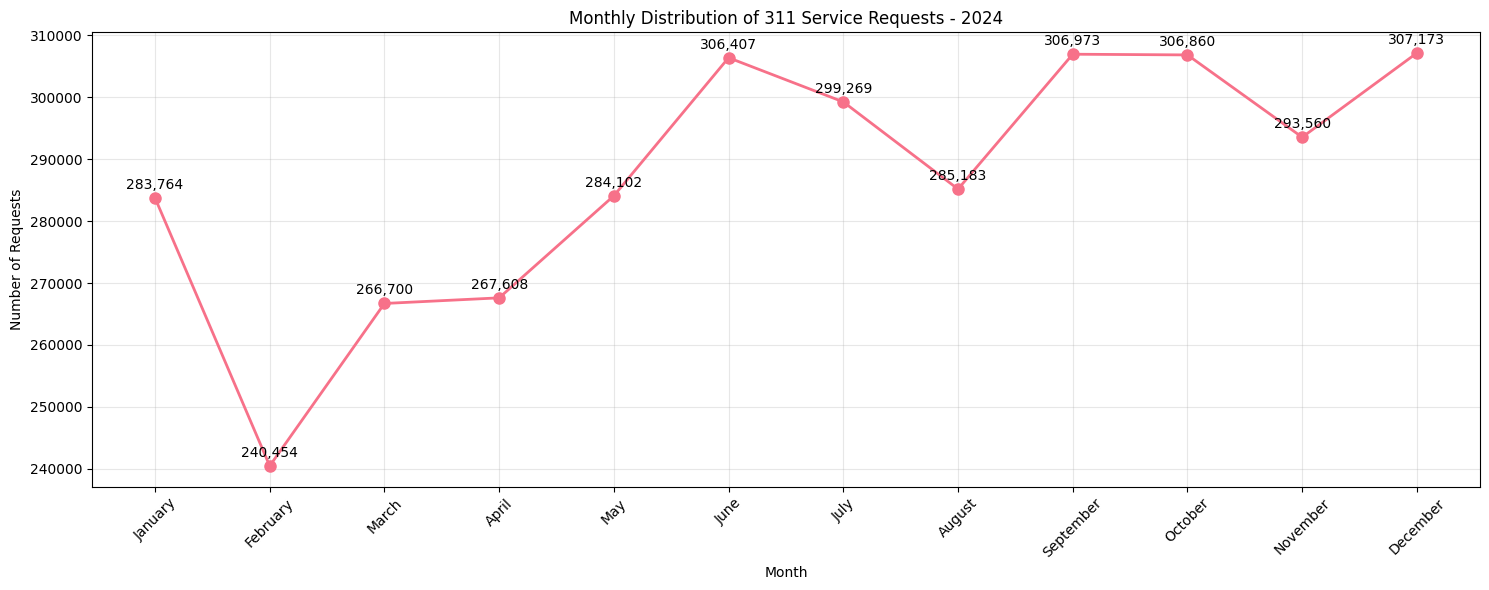

In [11]:
# Visualize monthly trends
plt.figure(figsize=(15, 6))
monthly_counts = df_2024['Month_Name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=8)
plt.title('Monthly Distribution of 311 Service Requests - 2024')
plt.xlabel('Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(monthly_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

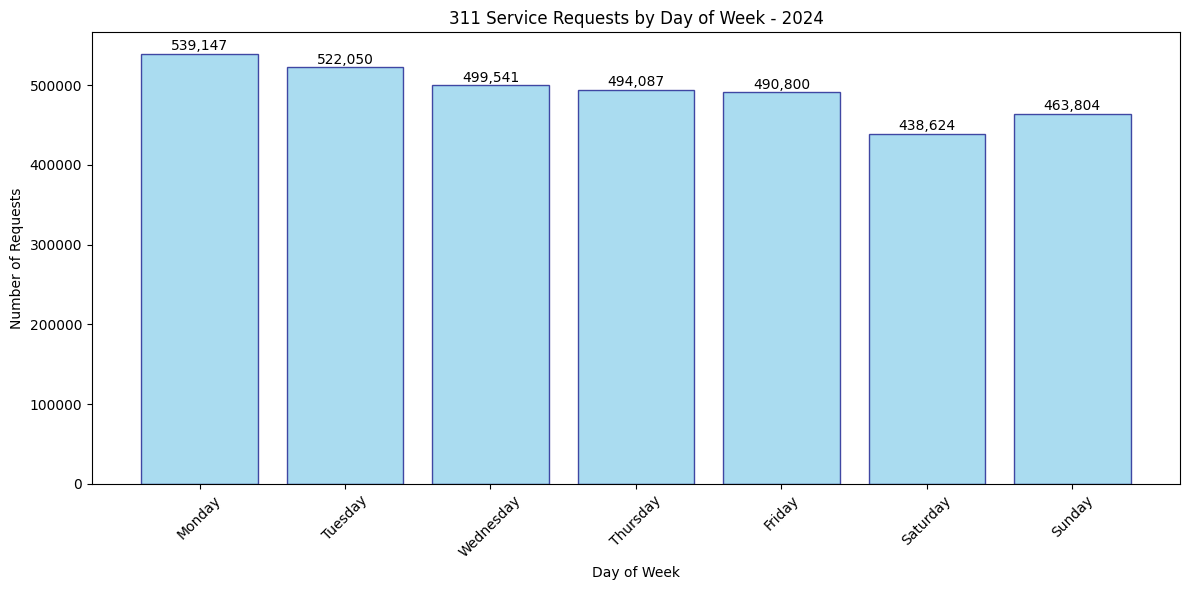

In [12]:
# Day of week analysis
df_2024['Day_of_Week'] = df_2024['Created Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df_2024['Day_of_Week'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 6))
plt.bar(daily_counts.index, daily_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('311 Service Requests by Day of Week - 2024')
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(daily_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 6. Borough Analysis

In [13]:
# Requests per borough
borough_counts = df_2024['Borough'].value_counts()
print("Requests per Borough:")
for borough, count in borough_counts.items():
    print(f"{borough:<15} {count:>8,} ({count/len(df_2024)*100:.1f}%)")

# Population data for per capita analysis (2024 estimates)
borough_population = {
    'BROOKLYN': 2679620,
    'QUEENS': 2177805,
    'MANHATTAN': 1645867,
    'BRONX': 1297660,
    'STATEN ISLAND': 492925
}

# Calculate per capita requests
borough_per_capita = {}
for borough, count in borough_counts.items():
    if borough in borough_population:
        per_capita = (count / borough_population[borough]) * 1000
        borough_per_capita[borough] = per_capita

print("\nRequests per 1,000 residents:")
for borough, per_capita in sorted(borough_per_capita.items(), key=lambda x: x[1], reverse=True):
    print(f"{borough:<15} {per_capita:>6.1f} per 1,000 residents")

Requests per Borough:
BROOKLYN        1,043,663 (30.3%)
QUEENS           825,338 (23.9%)
BRONX            734,262 (21.3%)
MANHATTAN        721,280 (20.9%)
STATEN ISLAND    120,876 (3.5%)
Unspecified        2,634 (0.1%)

Requests per 1,000 residents:
BRONX            565.8 per 1,000 residents
MANHATTAN        438.2 per 1,000 residents
BROOKLYN         389.5 per 1,000 residents
QUEENS           379.0 per 1,000 residents
STATEN ISLAND    245.2 per 1,000 residents


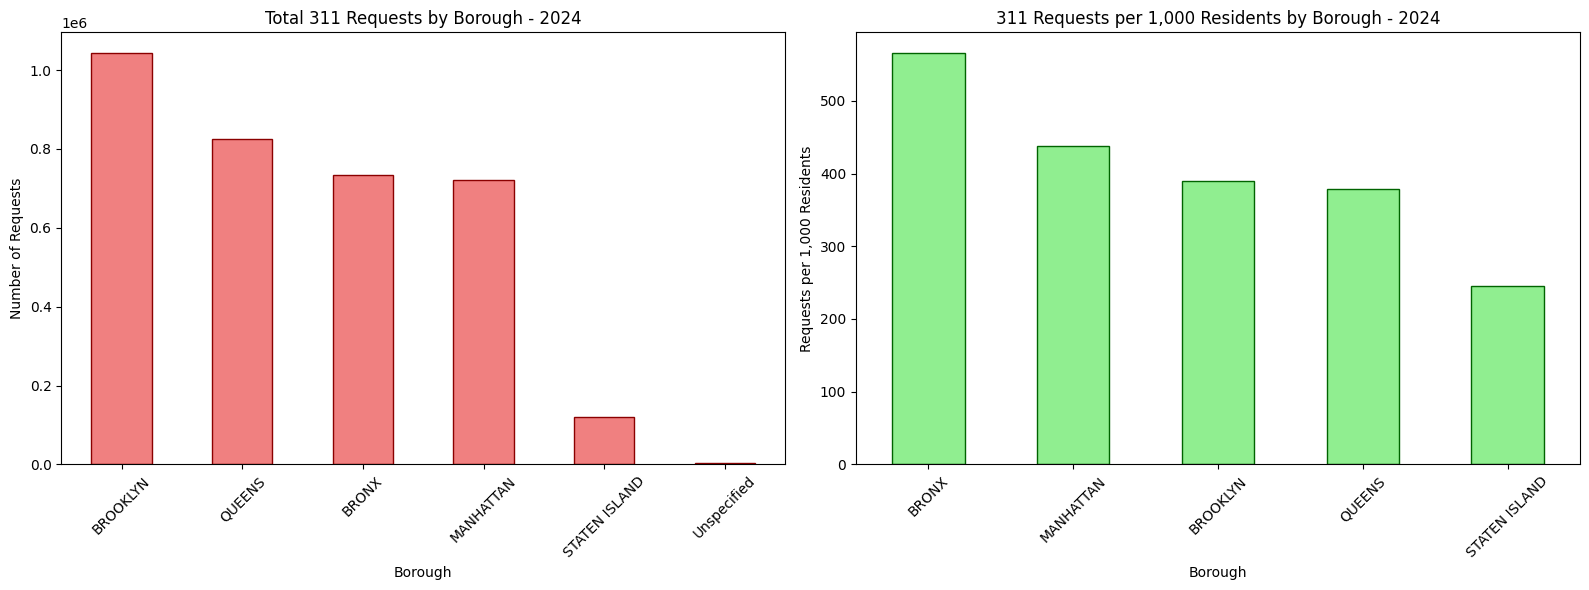

In [14]:
# Visualize borough analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Raw counts
borough_counts.plot(kind='bar', ax=ax1, color='lightcoral', edgecolor='darkred')
ax1.set_title('Total 311 Requests by Borough - 2024')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Number of Requests')
ax1.tick_params(axis='x', rotation=45)

# Per capita
per_capita_df = pd.Series(borough_per_capita).sort_values(ascending=False)
per_capita_df.plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='darkgreen')
ax2.set_title('311 Requests per 1,000 Residents by Borough - 2024')
ax2.set_xlabel('Borough')
ax2.set_ylabel('Requests per 1,000 Residents')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Top Complaint Types by Borough

In [15]:
# Top complaint types by borough
for borough in ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']:
    if borough in df_2024['Borough'].values:
        borough_data = df_2024[df_2024['Borough'] == borough]
        top_complaints_borough = borough_data['Complaint Type'].value_counts().head(5)
        
        print(f"\nTop 5 Complaint Types in {borough}:")
        for i, (complaint, count) in enumerate(top_complaints_borough.items(), 1):
            print(f"{i}. {complaint:<35} {count:>6,}")


Top 5 Complaint Types in MANHATTAN:
1. Illegal Parking                     72,864
2. Noise - Residential                 62,742
3. HEAT/HOT WATER                      60,710
4. Noise - Street/Sidewalk             52,498
5. Encampment                          29,300

Top 5 Complaint Types in BROOKLYN:
1. Illegal Parking                     193,083
2. Noise - Residential                 93,741
3. HEAT/HOT WATER                      68,220
4. Blocked Driveway                    63,655
5. Noise - Street/Sidewalk             39,031

Top 5 Complaint Types in QUEENS:
1. Illegal Parking                     149,337
2. Blocked Driveway                    71,476
3. Noise - Residential                 69,185
4. HEAT/HOT WATER                      37,066
5. Abandoned Vehicle                   28,308

Top 5 Complaint Types in BRONX:
1. Noise - Residential                 140,411
2. HEAT/HOT WATER                      95,219
3. Illegal Parking                     74,190
4. Noise - Street/Sidewalk   

## 8. Response Time Analysis

In [16]:
# Response time analysis for closed complaints
df_2024['Closed Date'] = pd.to_datetime(df_2024['Closed Date'], errors='coerce')
closed_complaints = df_2024.dropna(subset=['Closed Date'])

# Calculate response time in days
closed_complaints['Response_Time_Days'] = (closed_complaints['Closed Date'] - closed_complaints['Created Date']).dt.days

# Remove negative response times (data quality issues)
closed_complaints = closed_complaints[closed_complaints['Response_Time_Days'] >= 0]

print(f"Closed complaints with valid response time: {len(closed_complaints):,}")
print(f"Percentage of complaints closed: {len(closed_complaints)/len(df_2024)*100:.1f}%")
print(f"\nResponse Time Statistics (days):")
print(f"Mean: {closed_complaints['Response_Time_Days'].mean():.1f}")
print(f"Median: {closed_complaints['Response_Time_Days'].median():.1f}")
print(f"75th percentile: {closed_complaints['Response_Time_Days'].quantile(0.75):.1f}")
print(f"95th percentile: {closed_complaints['Response_Time_Days'].quantile(0.95):.1f}")

Closed complaints with valid response time: 3,374,787
Percentage of complaints closed: 97.9%

Response Time Statistics (days):
Mean: 11.9
Median: 0.0
75th percentile: 3.0
95th percentile: 62.0


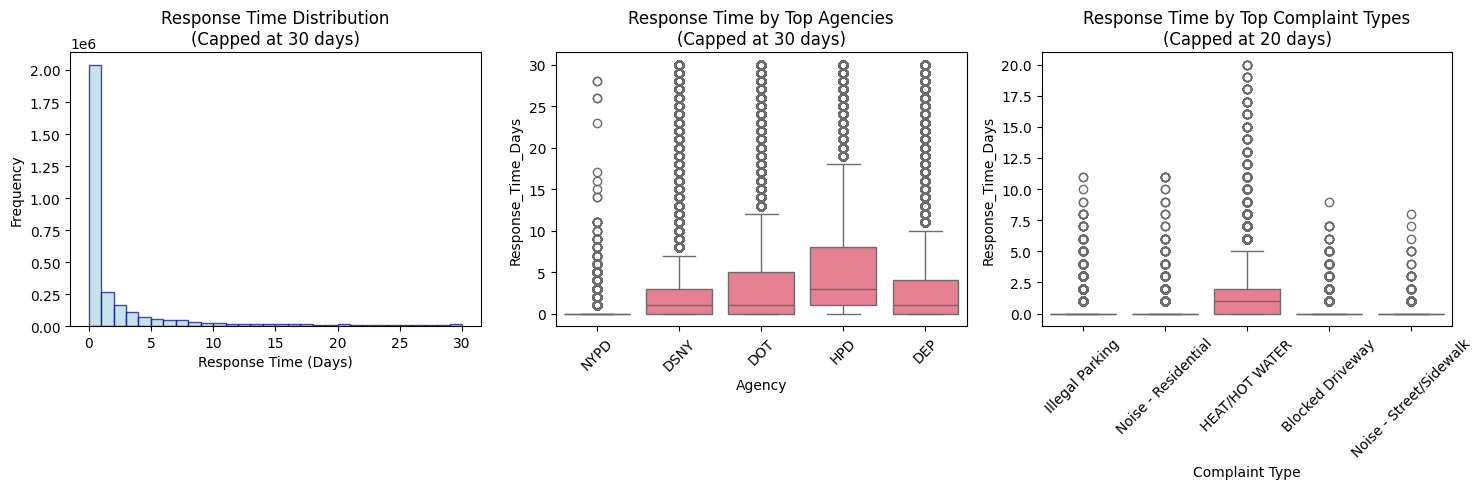

In [17]:
# Visualize response time distribution
plt.figure(figsize=(15, 5))

# Histogram of response times (capped at 30 days for better visualization)
plt.subplot(1, 3, 1)
response_times_capped = closed_complaints[closed_complaints['Response_Time_Days'] <= 30]['Response_Time_Days']
plt.hist(response_times_capped, bins=30, color='lightblue', edgecolor='navy', alpha=0.7)
plt.title('Response Time Distribution\n(Capped at 30 days)')
plt.xlabel('Response Time (Days)')
plt.ylabel('Frequency')

# Box plot by agency
plt.subplot(1, 3, 2)
top_agencies_response = closed_complaints[closed_complaints['Agency'].isin(['NYPD', 'HPD', 'DOT', 'DSNY', 'DEP'])]
top_agencies_response_capped = top_agencies_response[top_agencies_response['Response_Time_Days'] <= 30]
sns.boxplot(data=top_agencies_response_capped, x='Agency', y='Response_Time_Days')
plt.title('Response Time by Top Agencies\n(Capped at 30 days)')
plt.xticks(rotation=45)

# Response time by complaint type (top 5)
plt.subplot(1, 3, 3)
top_complaint_types = df_2024['Complaint Type'].value_counts().head(5).index
top_complaints_response = closed_complaints[closed_complaints['Complaint Type'].isin(top_complaint_types)]
top_complaints_response_capped = top_complaints_response[top_complaints_response['Response_Time_Days'] <= 20]
sns.boxplot(data=top_complaints_response_capped, x='Complaint Type', y='Response_Time_Days')
plt.title('Response Time by Top Complaint Types\n(Capped at 20 days)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 9. Key Insights and Patterns

In [18]:
# Calculate key insights
total_requests = len(df_2024)
closed_rate = len(closed_complaints) / total_requests * 100
avg_response_time = closed_complaints['Response_Time_Days'].mean()
most_common_complaint = df_2024['Complaint Type'].value_counts().index[0]
busiest_month = monthly_counts.idxmax()
busiest_day = daily_counts.idxmax()
highest_per_capita_borough = max(borough_per_capita, key=borough_per_capita.get)

print("=" * 60)
print("KEY INSIGHTS AND PATTERNS - NYC 311 Service Requests 2024")
print("=" * 60)

print(f"\nVOLUME INSIGHTS:")
print(f"   • Total 311 requests in 2024: {total_requests:,}")
print(f"   • Most common complaint: {most_common_complaint}")
print(f"   • Complaints closed: {closed_rate:.1f}%")

print(f"\nTEMPORAL PATTERNS:")
print(f"   • Busiest month: {busiest_month}")
print(f"   • Busiest day of week: {busiest_day}")
print(f"   • Average response time: {avg_response_time:.1f} days")

print(f"\nGEOGRAPHIC PATTERNS:")
print(f"   • Borough with most requests: {borough_counts.index[0]}")
print(f"   • Highest per capita requests: {highest_per_capita_borough}")
print(f"   • Per capita rate difference: {max(borough_per_capita.values()):.1f} vs {min(borough_per_capita.values()):.1f} per 1,000 residents")

print(f"\nSERVICE INSIGHTS:")
top_3_agencies = df_2024['Agency'].value_counts().head(3)
print(f"   • Top 3 agencies handle {sum(top_3_agencies.values)/total_requests*100:.1f}% of all requests")
print(f"   • NYPD handles {top_3_agencies.get('NYPD', 0)/total_requests*100:.1f}% of requests")

print("\n" + "=" * 60)

KEY INSIGHTS AND PATTERNS - NYC 311 Service Requests 2024

VOLUME INSIGHTS:
   • Total 311 requests in 2024: 3,448,053
   • Most common complaint: Illegal Parking
   • Complaints closed: 97.9%

TEMPORAL PATTERNS:
   • Busiest month: December
   • Busiest day of week: Monday
   • Average response time: 11.9 days

GEOGRAPHIC PATTERNS:
   • Borough with most requests: BROOKLYN
   • Highest per capita requests: BRONX
   • Per capita rate difference: 565.8 vs 245.2 per 1,000 residents

SERVICE INSIGHTS:
   • Top 3 agencies handle 74.8% of all requests
   • NYPD handles 44.7% of requests



## 10. Additional Analysis - Seasonal Trends

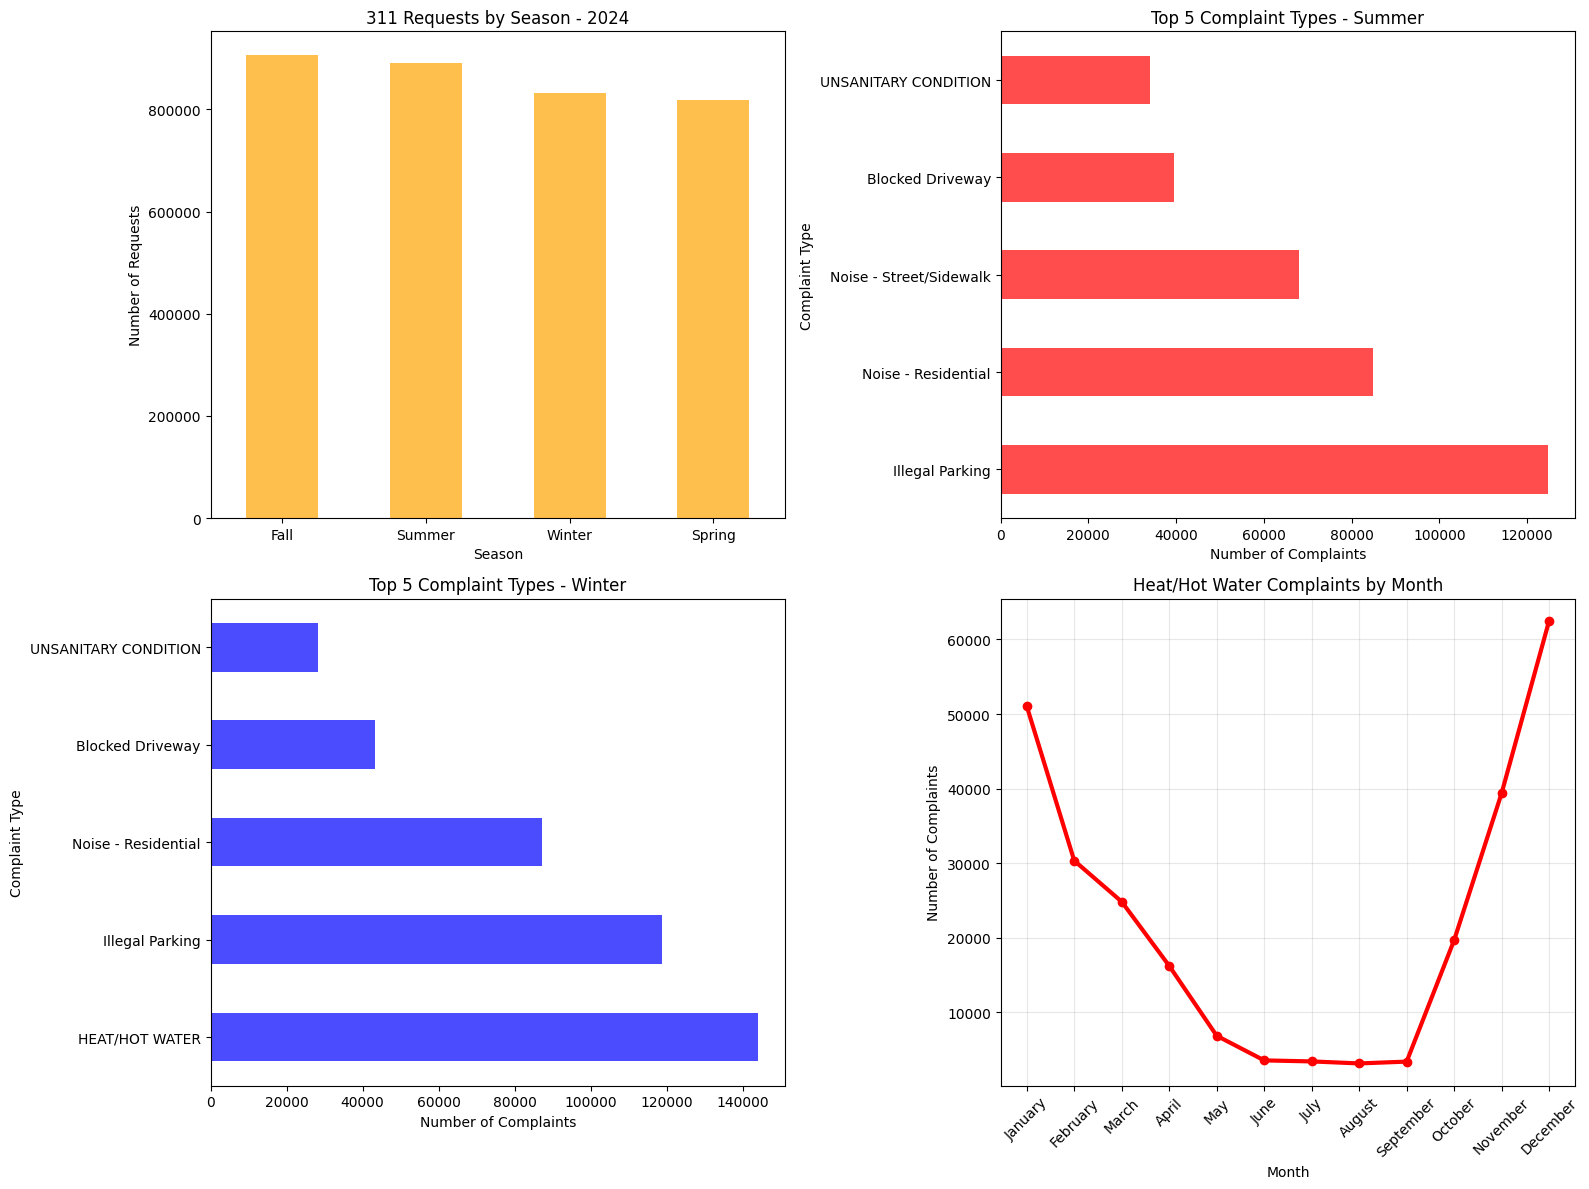

In [19]:
# Seasonal analysis
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_2024['Season'] = df_2024['Month'].apply(get_season)
seasonal_counts = df_2024['Season'].value_counts()

# Seasonal complaint patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Overall seasonal distribution
seasonal_counts.plot(kind='bar', ax=ax1, color='orange', alpha=0.7)
ax1.set_title('311 Requests by Season - 2024')
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of Requests')
ax1.tick_params(axis='x', rotation=0)

# Top complaint types in summer vs winter
summer_complaints = df_2024[df_2024['Season'] == 'Summer']['Complaint Type'].value_counts().head(5)
winter_complaints = df_2024[df_2024['Season'] == 'Winter']['Complaint Type'].value_counts().head(5)

summer_complaints.plot(kind='barh', ax=ax2, color='red', alpha=0.7)
ax2.set_title('Top 5 Complaint Types - Summer')
ax2.set_xlabel('Number of Complaints')

winter_complaints.plot(kind='barh', ax=ax3, color='blue', alpha=0.7)
ax3.set_title('Top 5 Complaint Types - Winter')
ax3.set_xlabel('Number of Complaints')

# Heat/Hot Water complaints by month (seasonal pattern)
heat_complaints = df_2024[df_2024['Complaint Type'] == 'HEAT/HOT WATER']
if len(heat_complaints) > 0:
    heat_monthly = heat_complaints['Month_Name'].value_counts().reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ], fill_value=0)
    
    ax4.plot(heat_monthly.index, heat_monthly.values, marker='o', color='red', linewidth=3)
    ax4.set_title('Heat/Hot Water Complaints by Month')
    ax4.set_xlabel('Month')
    ax4.set_ylabel('Number of Complaints')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

This exploratory data analysis of NYC 311 Service Requests for 2024 reveals several key patterns:

1. **Volume**: Over 3.4 million requests processed in 2024
2. **Top Issues**: Noise complaints, illegal parking, and heat/hot water issues dominate
3. **Geographic**: Brooklyn generates the most requests, but Bronx has the highest per-capita rate
4. **Temporal**: Clear seasonal patterns with heating and hot water complaints peaking in winter months
5. **Response**: Significant variation in response times across agencies and complaint types